In [6]:
#Now let's open it with pandas
import pandas as pd 
from pandas import Series,DataFrame

In [7]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [8]:
# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# We could also get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
So let's start with the first question: Who were the passengers on the titanic?

# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

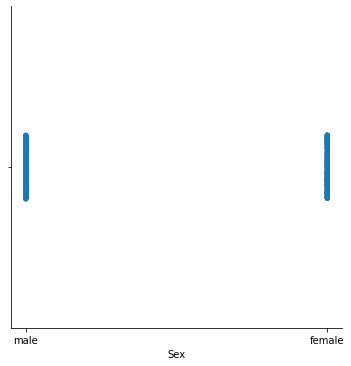

In [11]:
# Let's first check gender
sns.catplot(x="Sex",data=titanic_df)

In [12]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(Passenger):
    # Take the Age and Sex
    age,sex = Passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [26]:
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [27]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


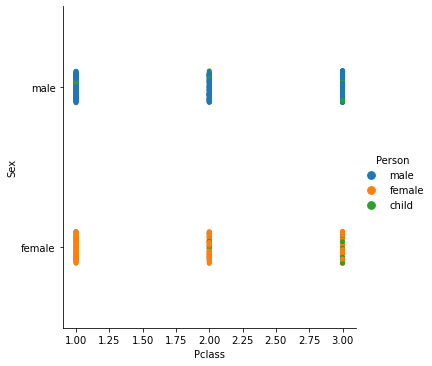

In [41]:
Excellent! Now we have seperated the passengers between female,male,and child. 
This will be important later on beacuse of the famous "Women and children first policy"!
# Let's try the catplot again!
sns.catplot(x="Pclass",y="Sex",data=titanic_df,hue='Person')

<AxesSubplot:>

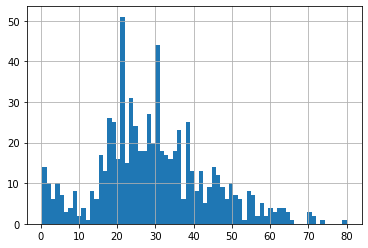

In [42]:
Interesting, quite a bit of children in 3rd class and not so many in 1st!
How about we create a distribution of the ages to get a more precise picture of the who the passengers were

# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [43]:
titanic_df['Age'].mean()

29.69911764705882

In [44]:
# We could also get a quick overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

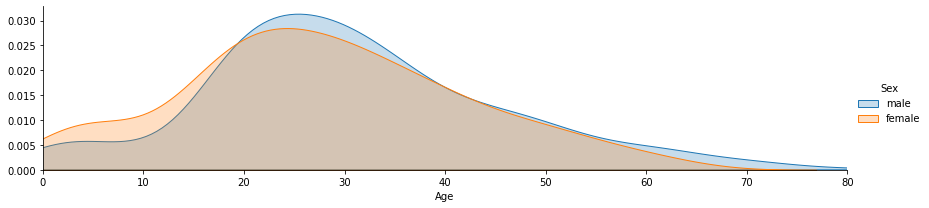

In [46]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

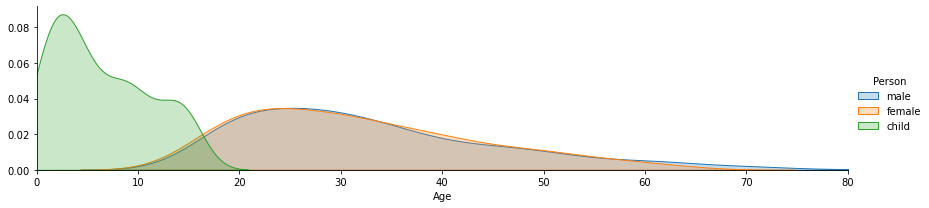

In [47]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

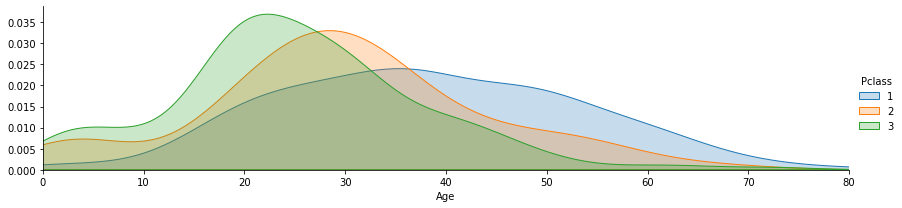

In [48]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [49]:
We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. 
So let's move on to our 2nd question: 
What deck were the passengers on and how does that relate to their class?

# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [51]:
So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [52]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [55]:
Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

# So let's grab that letter for the deck level with a simple for loop

# Set empty list

levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])
    
    # Reset DataFrame and use catplot plot
    cabin_df = DataFrame(levels)
    cabin_df.columns = ['Cabin']
    

In [57]:
Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?

# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [14]:
Note here that the Embarked column has C,Q,and S values. 
Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?


In [15]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [16]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [19]:
Now we know that if the Alone column is anything but 0, 
then the passenger had family aboard and wasn't alone. 
So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, 
otherwise they were alone.

# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


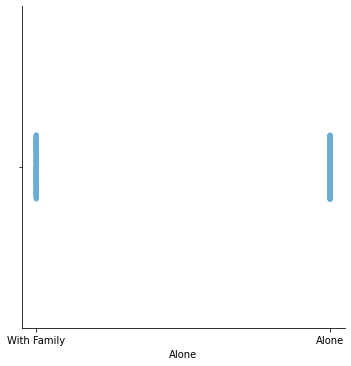

In [21]:
# Now let's get a simple visualization!
sns.catplot(x="Alone",data=titanic_df,palette='Blues')

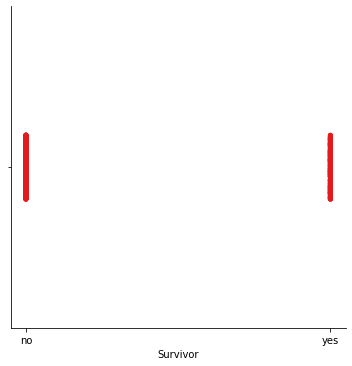

In [25]:
Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: 
What factors helped someone survive the sinking?

# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
# Let's just get a quick overall view of survied vs died.
sns.catplot(x="Survivor",data=titanic_df,palette='Set1')

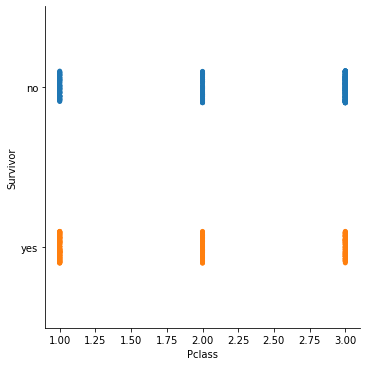

In [28]:
So quite a few more people died than those who survived. 
Let's see if the class of the passengers had an effect on their survival rate,
since the movie Titanic popularized the notion that the 3rd class passengers 
did not do as well as their 1st and 2nd class counterparts.

# Let's use a cat plot again, but now considering class
sns.catplot(x="Pclass",y="Survivor",data=titanic_df)

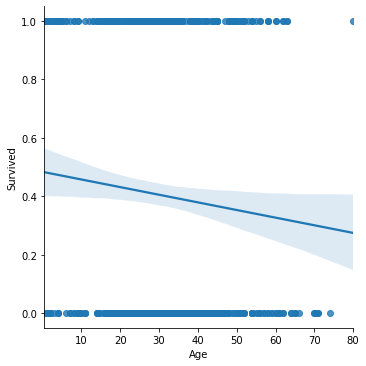

In [30]:
From this data it looks like being a male or being in 3rd class were both not favourable for survival. 
Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

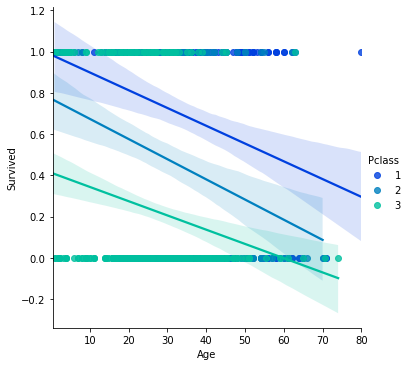

In [31]:
Looks like there is a general trend that the older the passenger was, the less likely they survived. 
Let's go ahead and use hue to take a look at the effect of class and age.

# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

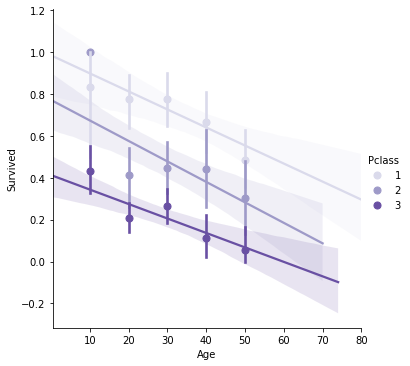

In [37]:
We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10,20,30,40,50]
sns.lmplot(x="Age",y="Survived",hue='Pclass',data=titanic_df,palette='Purples',x_bins=generations)

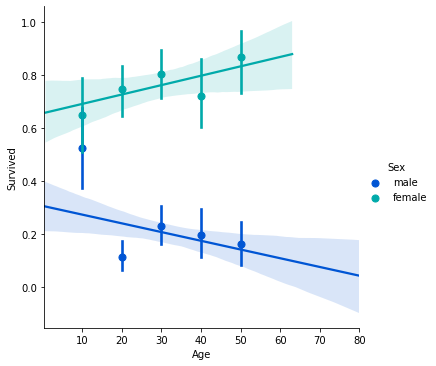

In [34]:
Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?


sns.lmplot(x="Age",y="Survived",hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [44]:
#Finally, I'll leave with a gif of my favorite scene from the movie Titanic
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')